<h2>Importing the necessary Libraries</h2>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [104]:
heart_df=pd.read_csv('heart.csv')
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [21]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<h3>Dataset Description</h3>

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

<b>To check whether the dataset has any NULL values</b>

In [23]:
heart_df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>Data Analysis</h3>

Text(0.5, 1.0, 'Target class')

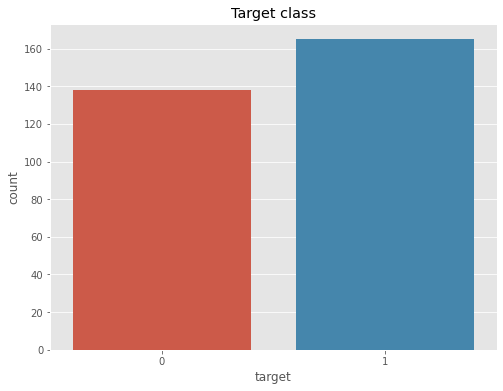

In [55]:
sns.countplot(x=heart_df['target'])
plt.title('Target class')

Text(0.5, 1.0, 'Count of Men and Women')

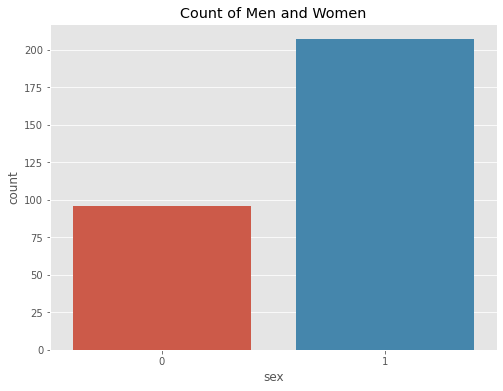

In [50]:
rcParams['figure.figsize']=(8,6)
sns.countplot(x=heart_df['sex'])
plt.title('Count of Men and Women')

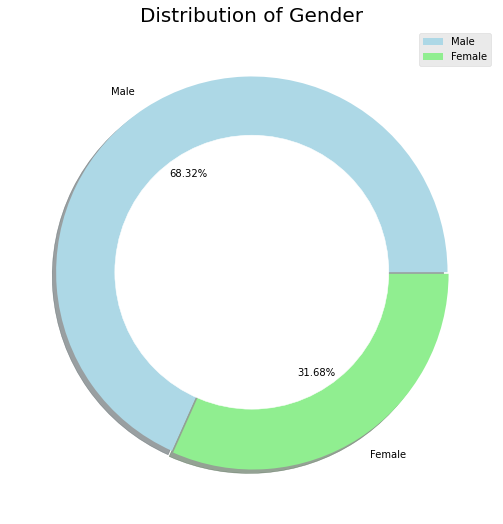

In [100]:
size = heart_df['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

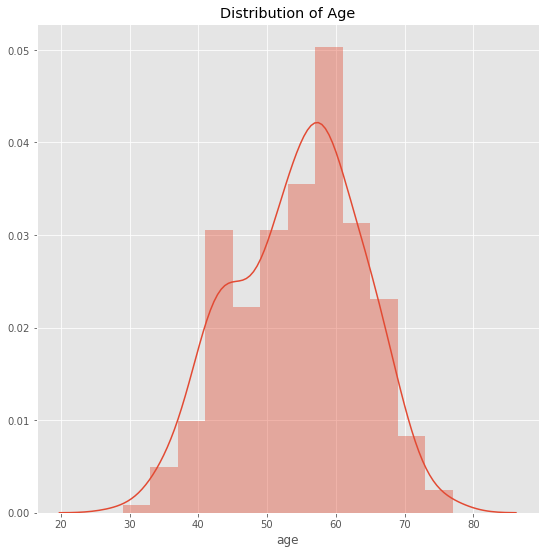

In [80]:
sns.distplot(heart_df['age'])
plt.title('Distribution of Age')

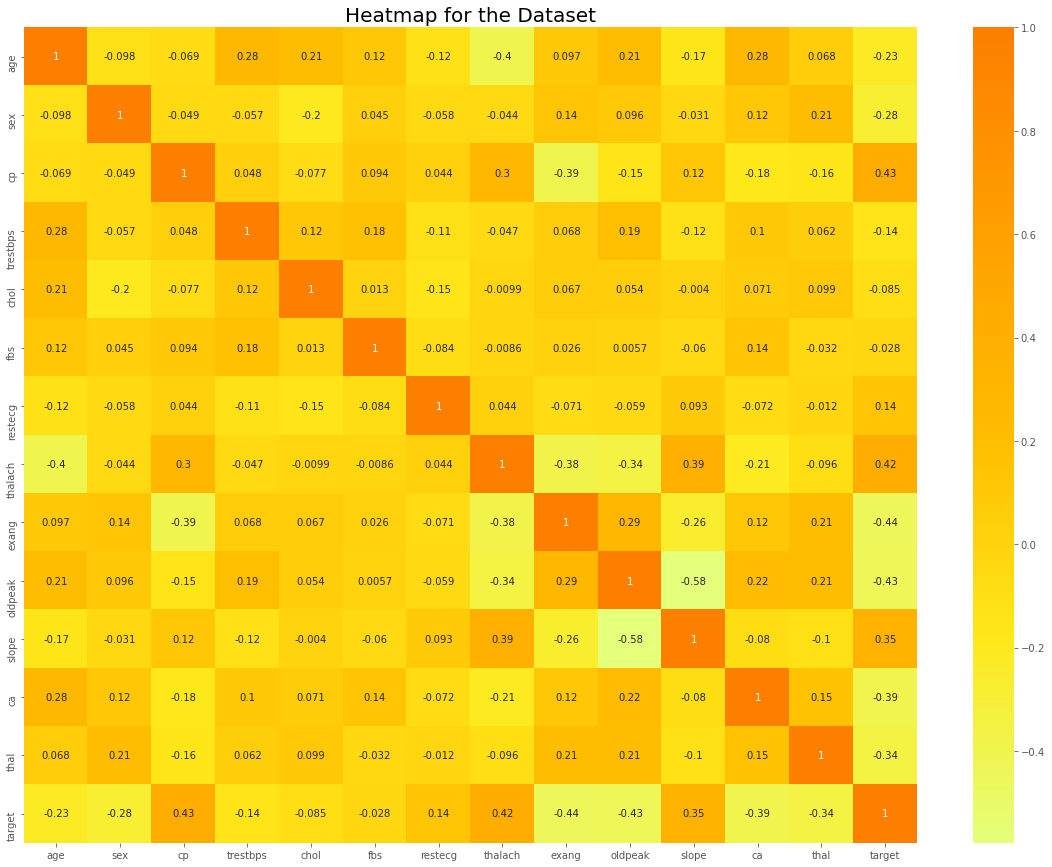

In [47]:
sns.heatmap(heart_df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

<h2>Let's observe the correlation of the features with the target class</h2>

Text(0.5, 1.0, 'Relation of Restecg with the target class')

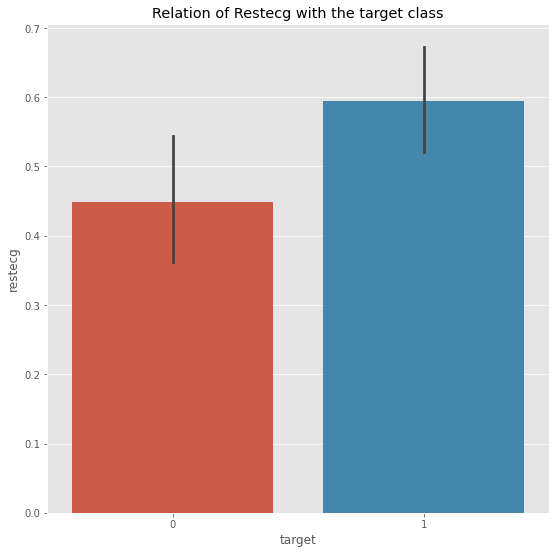

In [91]:
sns.barplot(y=heart_df['restecg'],x=heart_df['target'])
plt.title('Relation of Restecg with the Target Class'

We can observe that people who have a heart disease are likely to have higher restecg value than others.Value of restecg above 0.5,chances of having a heart disease are high.

Text(0.5, 1.0, 'Chestpain vs Target Class')

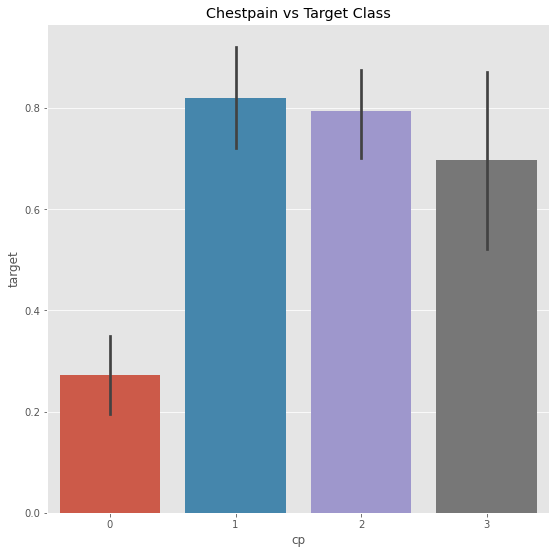

In [112]:
sns.barplot(x=heart_df['cp'],y=heart_df['target'])
plt.title('Chestpain vs Target Class')

We can clearly observe that Chest pain of type 1 and type 2 are at a higher risk of having a heart disease.

Text(0.5, 1.0, 'Relation of Cholestrol with the Target Class')

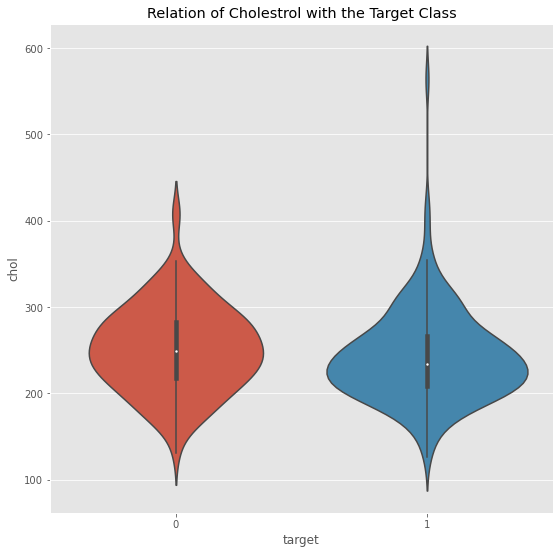

In [113]:
sns.violinplot(y=heart_df['chol'],x=heart_df['target'])
plt.title('Relation of Cholestrol with the Target Class')

We can clearly see that people who are most likely not suffering from a heart disease have slightly lesser cholestrol.

Text(0.5, 1.0, 'Relation of Resting Blood Pressure with the Target Class')

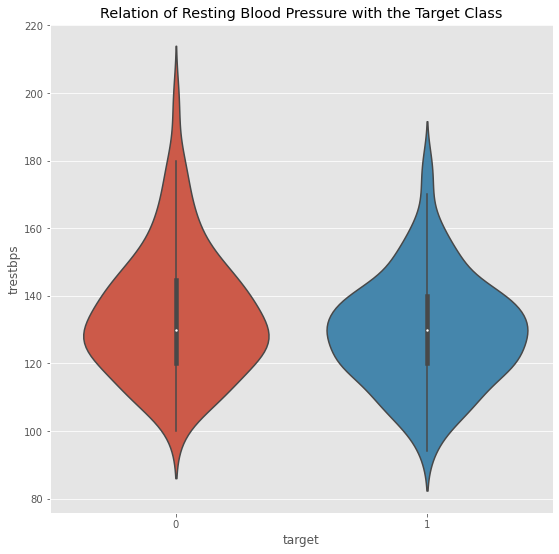

In [94]:
sns.violinplot(y=heart_df['trestbps'],x=heart_df['target'])
plt.title('Relation of Resting Blood Pressure with the Target Class')

We can clearly see that people who are most likely not suffering from a heart disease have slightly higher bloodpressure.

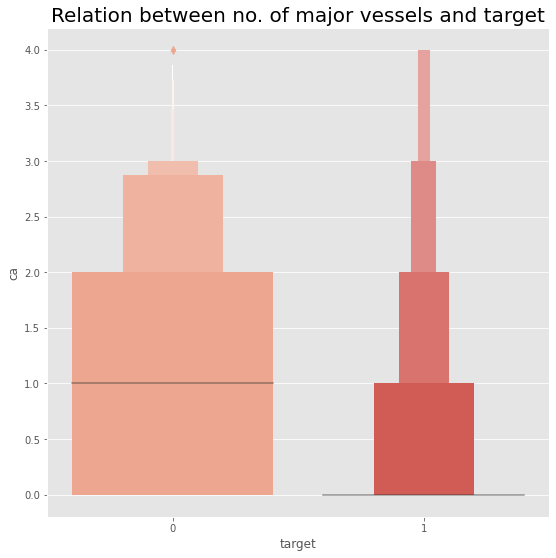

In [102]:
sns.boxenplot(heart_df['target'], heart_df['ca'], palette = 'Reds')
plt.title('Relation between no. of major vessels and target', fontsize = 20, fontweight = 30)
plt.show()

Patients who are more likely to suffer from Heart diseases are having high values of Major Vessels wheras the patiets who are very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.

Hence, It is also helpful in determining the heart diseases, the more the number of vessels, the more is the chance of suffering from heart diseases.

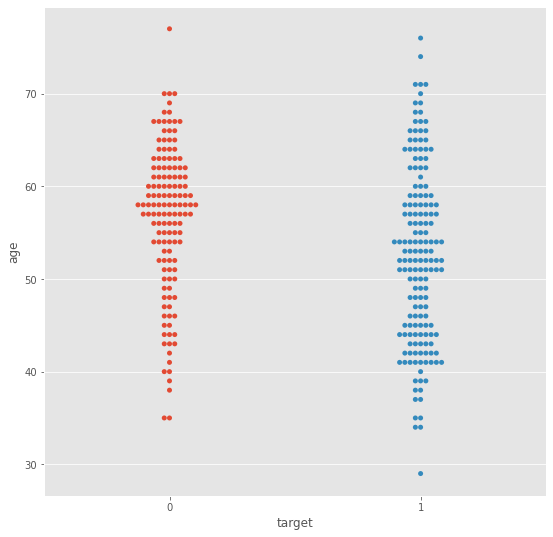

In [97]:
sns.swarmplot(x=heart_df['target'],y=heart_df['age'])

The above plot suggests that age is not a good predictor of a heart disease

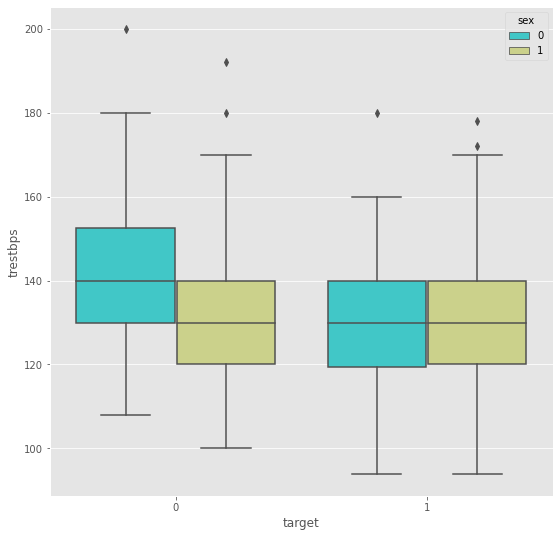

In [99]:
sns.boxplot(x = heart_df['target'], y = heart_df['trestbps'], hue = heart_df['sex'], palette = 'rainbow')

<h2>Data Preprocessing</h2>

In [115]:
heart_df = pd.get_dummies(heart_df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [116]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_df[columns_to_scale] = standardScaler.fit_transform(heart_df[columns_to_scale])

In [117]:
heart_df.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
6,0.180175,0.478391,0.922521,0.146634,0.224643,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,1,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
9,0.290464,1.049520,-1.512490,1.064975,0.483451,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [119]:
y = heart_df['target']
X = heart_df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

<h2>Importing Machine Learning Models</h2>

In [169]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

<h1>LOGISTIC REGRESSION</h1>

In [129]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [130]:
LRyhat=LR.predict(X_test)

In [132]:
accuracy_score(LRyhat,y_test)

0.8461538461538461

In [133]:
classification_report(LRyhat,y_test)

'              precision    recall  f1-score   support\n\n           0       0.80      0.88      0.83        40\n           1       0.89      0.82      0.86        51\n\n    accuracy                           0.85        91\n   macro avg       0.84      0.85      0.85        91\nweighted avg       0.85      0.85      0.85        91\n'

In [134]:
confusion_matrix(LRyhat,y_test)

array([[35,  5],
       [ 9, 42]], dtype=int64)

<h4>ACCURACY OF LOGISTIC REGRESSION CLASSIFIER IS 84.61%</h4>

<h1>SUPPORT VECTOR MACHINES</h1>

In [154]:
svm = SVC(random_state = 1,kernel='rbf')
svm.fit(X_train, y_train)

SVC(random_state=1)

In [155]:
SVMyhat=svm.predict(X_test)

In [156]:
accuracy_score(SVMyhat,y_test)

0.8021978021978022

In [157]:
classification_report(SVMyhat,y_test)

'              precision    recall  f1-score   support\n\n           0       0.73      0.84      0.78        38\n           1       0.87      0.77      0.82        53\n\n    accuracy                           0.80        91\n   macro avg       0.80      0.81      0.80        91\nweighted avg       0.81      0.80      0.80        91\n'

In [158]:
confusion_matrix(SVMyhat,y_test)

array([[32,  6],
       [12, 41]], dtype=int64)

<h4>ACCURACY OF SUPPORT VECTOR MACHINE CLASSIFIER IS 80.21%</h4>

<h1>DECISION TREE CLASSIFIER</h1>

In [160]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [161]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [163]:
dtcyhat=dtc.predict(X_test)

In [164]:
accuracy_score(dtcyhat,y_test)

0.7472527472527473

In [165]:
classification_report(dtcyhat,y_test)

'              precision    recall  f1-score   support\n\n           0       0.73      0.74      0.74        43\n           1       0.77      0.75      0.76        48\n\n    accuracy                           0.75        91\n   macro avg       0.75      0.75      0.75        91\nweighted avg       0.75      0.75      0.75        91\n'

In [166]:
confusion_matrix(dtcyhat,y_test)

array([[32, 11],
       [12, 36]], dtype=int64)

<h4>ACCURACY SCORE OF DECISION TREE CLASSIFIER IS 74.72%</h4>

<h1>KNN CLASSIFIER</h1>

In [179]:
knn = KNeighborsClassifier(n_neighbors = 10)  # n_neighbors means k
knn.fit(X_train, y_train)
knnyhat = knn.predict(X_test)

In [177]:
accuracy_score(knnyhat,y_test)

0.8571428571428571

In [180]:
classification_report(knnyhat,y_test)

'              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85        41\n           1       0.89      0.84      0.87        50\n\n    accuracy                           0.86        91\n   macro avg       0.86      0.86      0.86        91\nweighted avg       0.86      0.86      0.86        91\n'

In [181]:
confusion_matrix(knnyhat,y_test)

array([[36,  5],
       [ 8, 42]], dtype=int64)

<h4>ACCURACY OF KNN CLASSIFIER WITH 10 NEIGHBOURS IS 85.71%</h4>

<h1>CONCLUSION</h1>

We see that the highest accuracy is achieved by KNN followed by Logistic Regression.

Heart Disease is one of the major concerns for society today.
It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data.